In [2]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [3]:
cifar_dir = 'cs231n/datasets/cifar-10-batches-py'

try:
    del X_train, y_train
    del X_test, y_test
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar_dir)

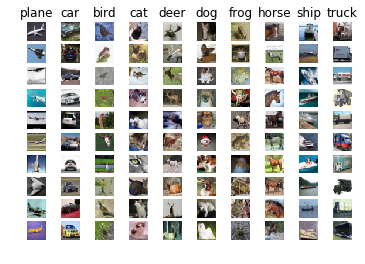

In [4]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_class = len(classes)
num_per_sample = 10
for y, cla in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, num_per_sample, replace=False)
    for i, va in enumerate(idxs):
        plt_idx =  i * num_per_sample + y + 1
        plt.subplot(num_per_sample, num_class, plt_idx)
        plt.imshow(X_train[va].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cla)
plt.show()

In [5]:
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


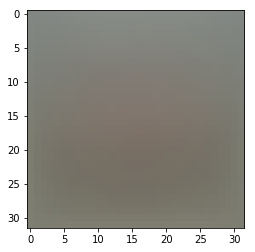

In [7]:
mean_img = np.mean(X_train, axis=0)
plt.figure(figsize=(4,4))
plt.imshow(mean_img.reshape(32,32,3).astype('uint8'))
plt.show()

X_train -= mean_img
X_val -= mean_img
X_test -= mean_img
X_dev -= mean_img

In [8]:
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [9]:
from cs231n.classifiers.linear_svm import svm_loss_naive
import time

W = np.random.randn(3073, 10) * 0.0001
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' %(loss, ))

loss: 9.389121


In [15]:
from random import randrange
ix = tuple([randrange(m) for m in X_dev.shape])
print(ix)

(137, 897)


In [16]:
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

from cs231n.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: 29.674309 analytic: 29.682268, relative error: 1.340912e-04
numerical: 11.974957 analytic: 11.974957, relative error: 1.273300e-11
numerical: -6.236572 analytic: -6.217928, relative error: 1.496939e-03
numerical: -19.919207 analytic: -19.919207, relative error: 6.793587e-12
numerical: -17.897048 analytic: -17.897048, relative error: 6.006665e-12
numerical: 0.861409 analytic: 0.861409, relative error: 1.282382e-11
numerical: -35.991934 analytic: -35.991934, relative error: 5.412588e-12
numerical: -31.546409 analytic: -31.546409, relative error: 1.564667e-12
numerical: -23.840956 analytic: -23.817429, relative error: 4.936470e-04
numerical: -0.823818 analytic: -0.823818, relative error: 3.068721e-10
numerical: -44.768079 analytic: -44.766690, relative error: 1.551610e-05
numerical: -22.504190 analytic: -22.498752, relative error: 1.208471e-04
numerical: 17.674484 analytic: 17.669532, relative error: 1.401073e-04
numerical: -20.581963 analytic: -20.586437, relative error: 1.086

In [ ]:
tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()

loss_vectorized,